# Random Variable

Challenge:
    
  - Get the numerical variables from our dataset.  
  - Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
  - Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [ ]:
# Getting the numerical variables from the dataset.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset into python

wfu = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
wfu

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
wfu.shape

(9134, 24)

In [5]:
wfu.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
wfu.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [7]:
# standardizing columns

cols = []
for i in range(len(wfu.columns)):
    cols.append(wfu.columns[i].lower().replace(' ','_'))
wfu.columns = cols
print(wfu.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [8]:
# what are the data types in this dataset
wfu.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [10]:
#checking for nulls 
wfu.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
# Since number of complaint column is categorical and we are interested in numerical, it will be dropped

wfu = wfu.drop(columns=['number_of_open_complaints'])

In [12]:
wf = pd.DataFrame(wfu)

In [14]:
wf_nums = wf._get_numeric_data()
wf_nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,2,198.234764
9130,3096.511217,21604,79,14,28,1,379.200000
9131,8163.890428,0,85,9,37,2,790.784983
9132,7524.442436,21941,96,34,3,3,691.200000


# 2 Using a distribution plot checking if the variables fit the theoretical normal or exponential distribution.

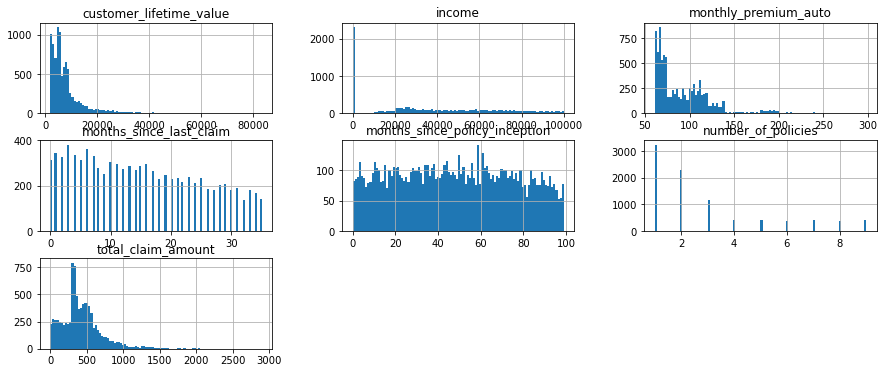

In [15]:

wf_nums.hist(bins=100, figsize=(15, 6), layout=(3, 3));

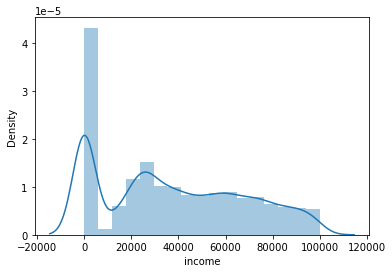

In [18]:
# for income

sns.distplot(wf_nums['income'])
plt.show()

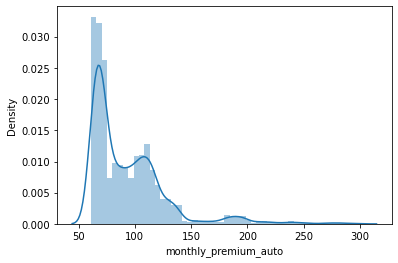

In [17]:
# for monthly premium 

sns.distplot(wf_nums['monthly_premium_auto'])
plt.show()

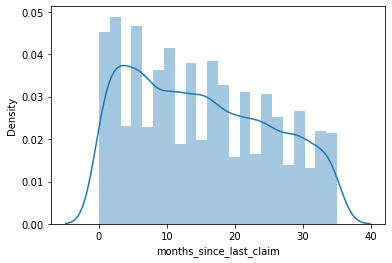

In [19]:

# for claim

sns.distplot(wf_nums['months_since_last_claim'])
plt.show()

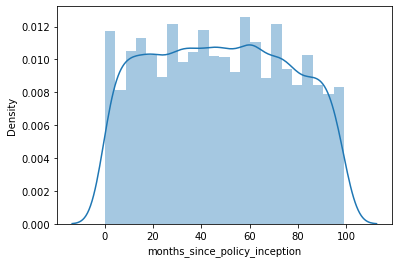

In [21]:
# for policy inception

sns.distplot(wf_nums['months_since_policy_inception'])
plt.show()

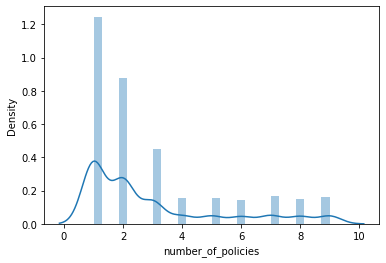

In [22]:
# for number of policies

sns.distplot(wf_nums['number_of_policies']) 
plt.show()

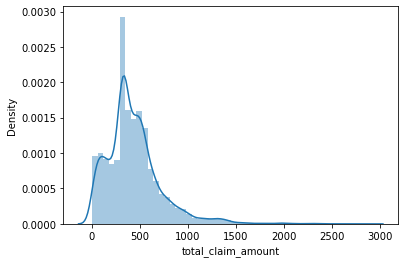

In [24]:
# for total claim amount

sns.distplot(wf_nums['total_claim_amount'])
plt.show()

# 3. Checking if any of the transformations all the way from up changes the result.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Replotting the variables

In [28]:
# customer_lifetime_value

iqr = np.percentile(wfu['customer_lifetime_value'],75) - np.percentile(wfu['customer_lifetime_value'],25)
upper_limit = np.percentile(wfu['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(wfu['customer_lifetime_value'],25) - 1.5*iqr

In [30]:
wfu_regr = wf_nums[(wfu['customer_lifetime_value']>lower_limit) & (wf_nums['customer_lifetime_value']<upper_limit)]

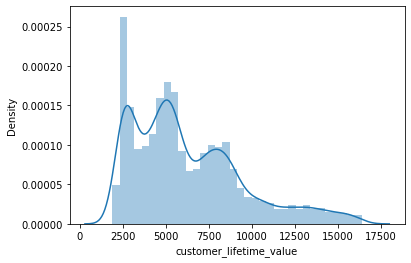

In [31]:
sns.distplot(wfu_regr['customer_lifetime_value'])
plt.show()

In [32]:
# monthly_premium

iqr = np.percentile(wfu['monthly_premium_auto'],75) - np.percentile(wfu['monthly_premium_auto'],25)
upper_limit = np.percentile(wfu['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(wfu['monthly_premium_auto'],25) - 1.5*iqr

In [33]:
wfu_regr = wf_nums[(wfu['monthly_premium_auto']>lower_limit) & (wf_nums['monthly_premium_auto']<upper_limit)]

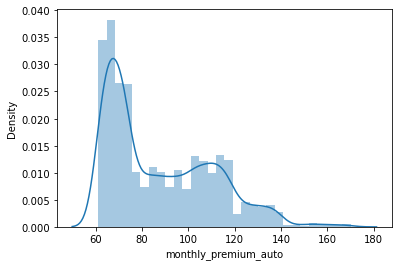

In [34]:
sns.distplot(wfu_regr['monthly_premium_auto'])
plt.show()

In [35]:
# number of policies

iqr = np.percentile(wfu['number_of_policies'],75) - np.percentile(wfu['number_of_policies'],25)
upper_limit = np.percentile(wfu['number_of_policies'],75) + 1.5*iqr
lower_limit = np.percentile(wfu['number_of_policies'],25) - 1.5*iqr

In [36]:
wfu_regr = wf_nums[(wfu['number_of_policies']>lower_limit) & (wf_nums['number_of_policies']<upper_limit)]

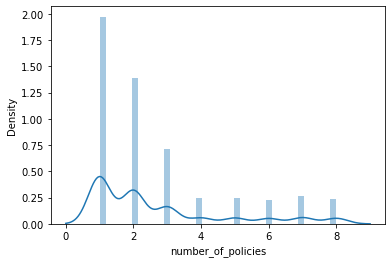

In [37]:
# replot monthly_premium_auto
sns.distplot(wfu_regr['number_of_policies'])
plt.show()

In [38]:
# Total Claim Amount

iqr = np.percentile(wfu['total_claim_amount'],75) - np.percentile(wfu['total_claim_amount'],25)
upper_limit = np.percentile(wfu['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(wfu['total_claim_amount'],25) - 1.5*iqr

In [39]:
wfu_regr = wf_nums[(wfu['total_claim_amount']>lower_limit) & (wf_nums['total_claim_amount']<upper_limit)]

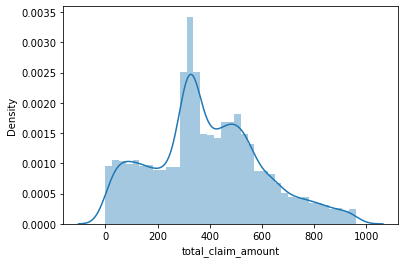

In [40]:
sns.distplot(wfu_regr['total_claim_amount'])
plt.show()